# 🎓 AI Bootcamp - Week 6 Day 3
## Decision Trees & Ensemble Methods

### Today's Learning Goals:
- ✅ Understand how Decision Trees make decisions
- ✅ Visualize tree structure and decision boundaries
- ✅ Learn about overfitting and pruning techniques
- ✅ Implement Random Forest for robust predictions
- ✅ Explore XGBoost for maximum accuracy
- ✅ Compare all methods on Titanic dataset

---

**Let's grow some decision trees! 🌳**

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
print('✅ Libraries loaded!')

✅ Libraries loaded!


## Part 1: Understanding Decision Trees with a Simple Example

Let's start by creating a simple dataset and seeing how a Decision Tree makes decisions!

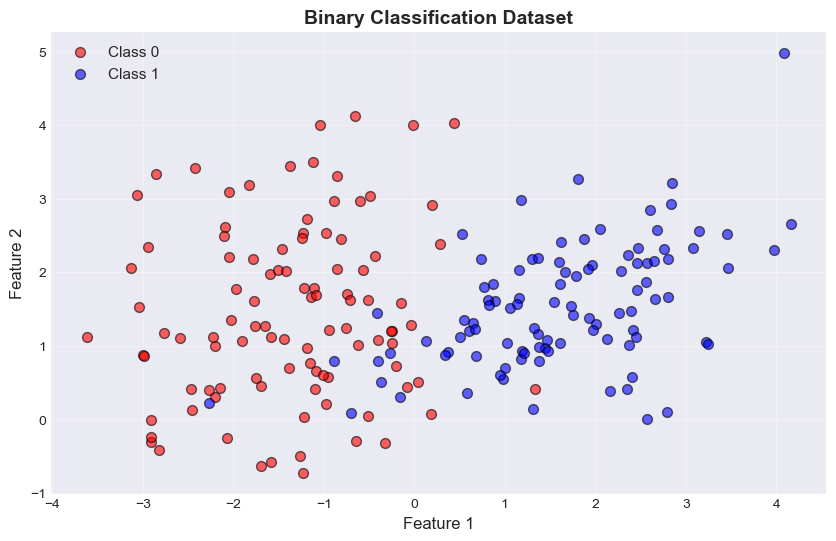

Training samples: 140
Test samples: 60
Class distribution: Class 0 = 100, Class 1 = 100


In [2]:
# Create a simple binary classification dataset
X, y = make_classification(
    n_samples=200, n_features=2, n_informative=2,
    n_redundant=0, n_clusters_per_class=1, 
    class_sep=1.5, random_state=42
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], c='red', label='Class 0', alpha=0.6, s=50, edgecolors='k')
plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', label='Class 1', alpha=0.6, s=50, edgecolors='k')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Binary Classification Dataset', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

print(f'Training samples: {len(X_train)}')
print(f'Test samples: {len(X_test)}')
print(f'Class distribution: Class 0 = {sum(y==0)}, Class 1 = {sum(y==1)}')

In [3]:
# Train a simple Decision Tree
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

# Make predictions
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('✅ Decision Tree trained!')
print(f'\nTree depth: {tree.get_depth()}')
print(f'Number of leaves: {tree.get_n_leaves()}')
print(f'Accuracy: {accuracy:.3f}')

print(f'\nSample predictions (first 5):')
for i in range(5):
    print(f'  True: {y_test[i]}, Predicted: {y_pred[i]}')

✅ Decision Tree trained!

Tree depth: 3
Number of leaves: 7
Accuracy: 0.900

Sample predictions (first 5):
  True: 0, Predicted: 0
  True: 0, Predicted: 0
  True: 0, Predicted: 1
  True: 1, Predicted: 1
  True: 1, Predicted: 1


### Visualize the Decision Tree Structure

Let's see how the tree makes its decisions!

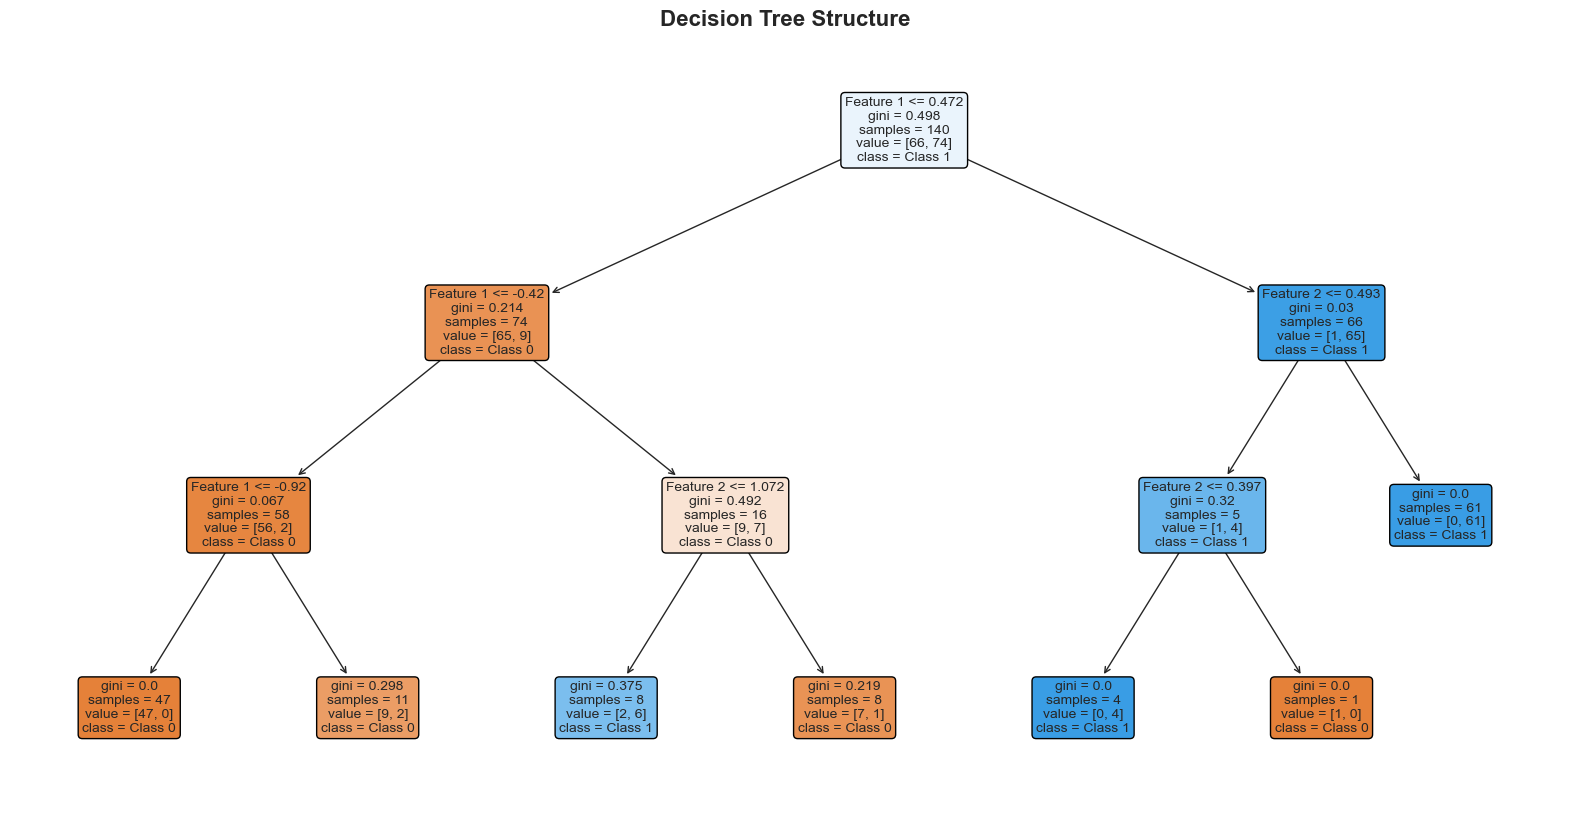


📖 How to read this tree:
  🔹 Each box is a node (a decision point)
  🔹 Color intensity shows the majority class
  🔹 "samples" = how many data points reach this node
  🔹 "value" = [count of class 0, count of class 1]
  🔹 "gini" = measure of impurity (0 = pure, 0.5 = most mixed)


In [4]:
# Visualize the tree structure
plt.figure(figsize=(20, 10))
plot_tree(tree, 
          feature_names=['Feature 1', 'Feature 2'],
          class_names=['Class 0', 'Class 1'],
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Structure', fontsize=16, fontweight='bold')
plt.show()

print('\n📖 How to read this tree:')
print('  🔹 Each box is a node (a decision point)')
print('  🔹 Color intensity shows the majority class')
print('  🔹 "samples" = how many data points reach this node')
print('  🔹 "value" = [count of class 0, count of class 1]')
print('  🔹 "gini" = measure of impurity (0 = pure, 0.5 = most mixed)')

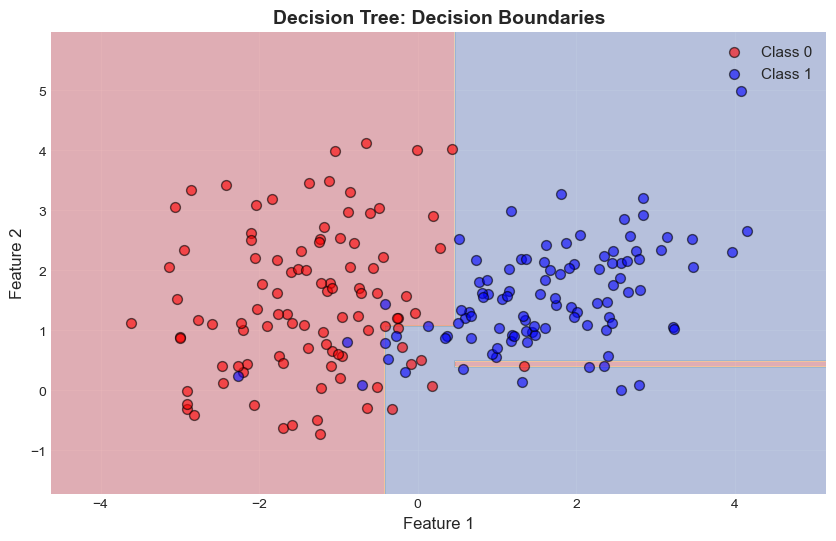


💡 Notice how the tree creates rectangular regions to separate classes!


In [5]:
# Function to visualize decision boundaries
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    plt.scatter(X[y==0, 0], X[y==0, 1], c='red', label='Class 0', 
                alpha=0.6, s=50, edgecolors='k')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', label='Class 1', 
                alpha=0.6, s=50, edgecolors='k')
    plt.xlabel('Feature 1', fontsize=12)
    plt.ylabel('Feature 2', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.show()

# Plot the decision boundary
plot_decision_boundary(tree, X, y, 'Decision Tree: Decision Boundaries')
print('\n💡 Notice how the tree creates rectangular regions to separate classes!')

## Part 2: Understanding Overfitting and Pruning

Let's see what happens when we let the tree grow too deep!

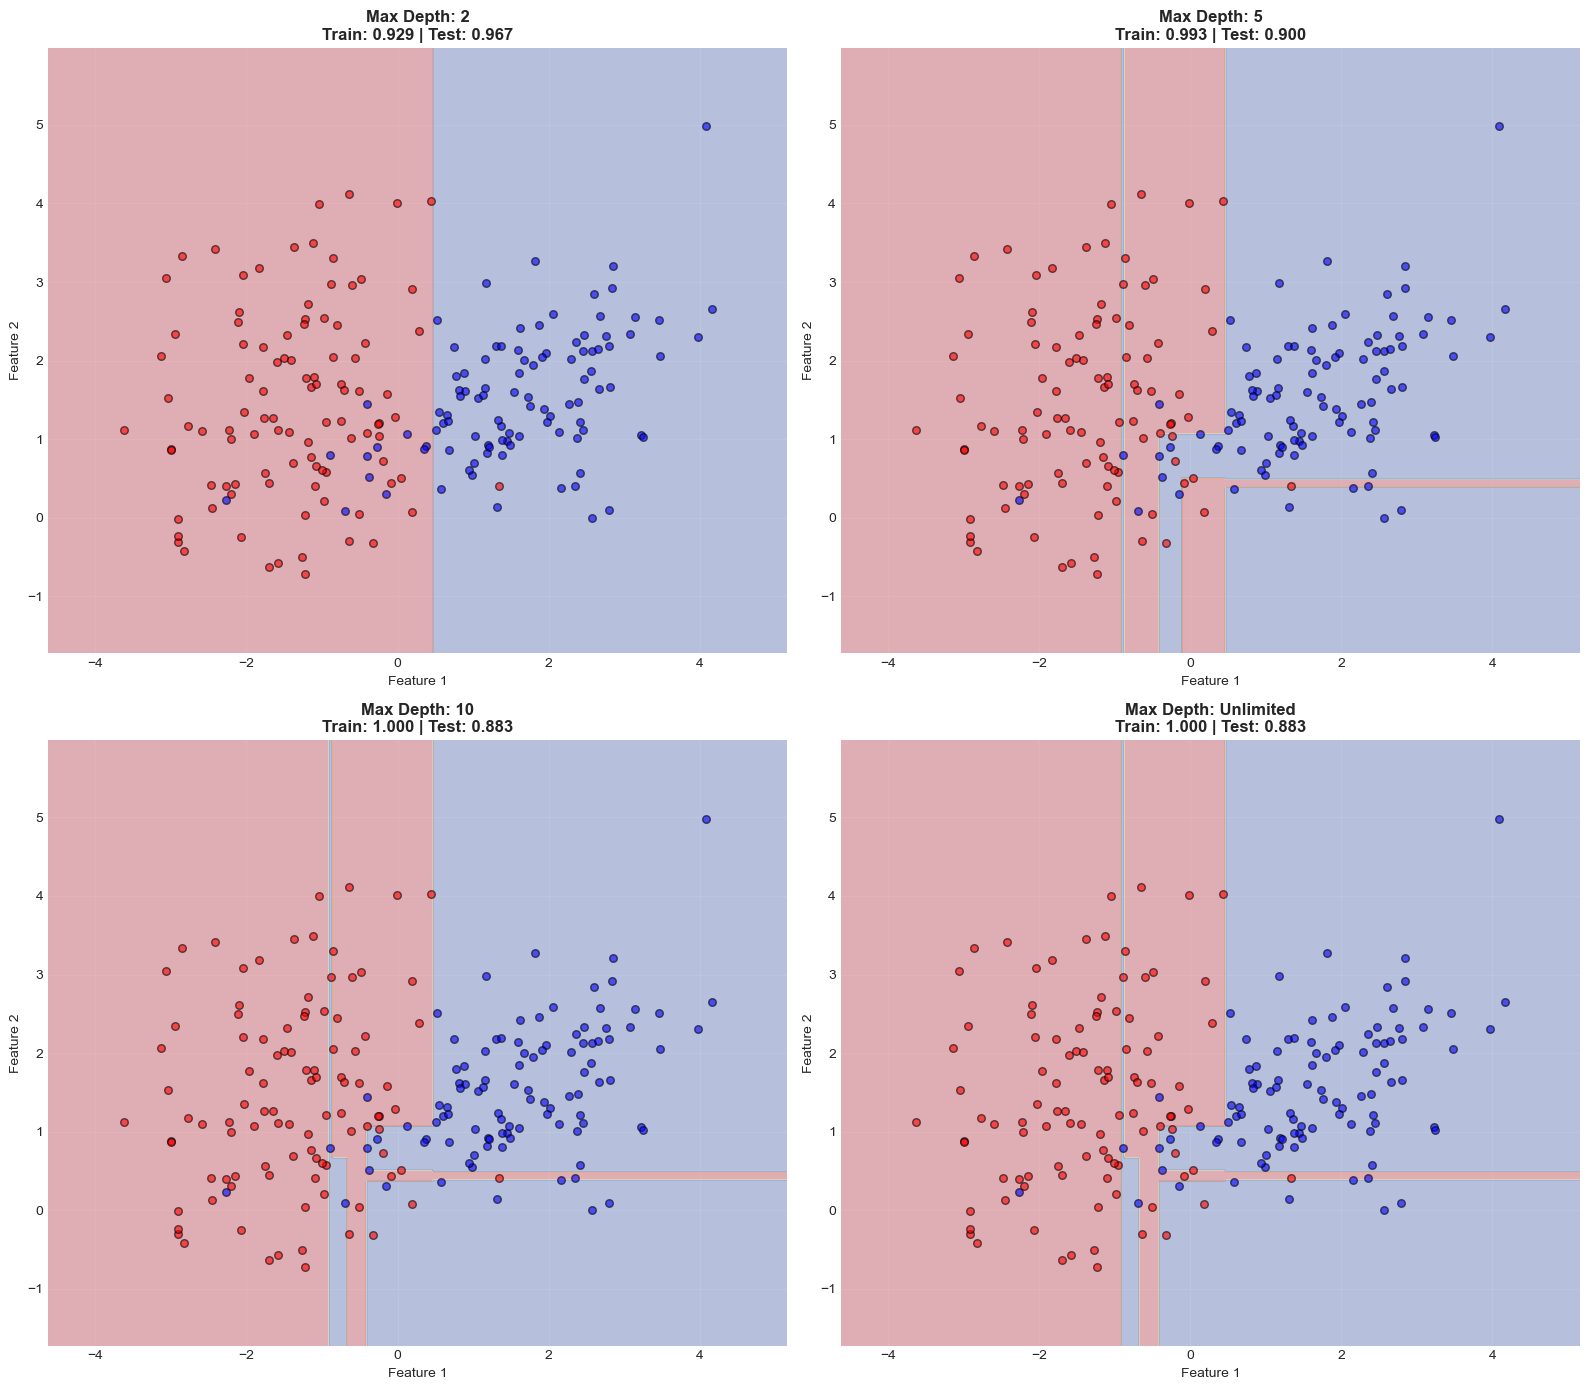


⚠️ Key Observations:
  • Shallow trees (depth 2): Underfitting - too simple, misses patterns
  • Deep trees (unlimited): Overfitting - too complex, memorizes noise
  • Medium depth (3-5): Just right - captures patterns without overfitting 🎯
  • Notice how test accuracy drops when depth is unlimited!


In [6]:
# Compare different tree depths
depths = [2, 5, 10, None]  # None = unlimited depth
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.ravel()

for idx, depth in enumerate(depths):
    tree_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_temp.fit(X_train, y_train)
    
    train_acc = tree_temp.score(X_train, y_train)
    test_acc = tree_temp.score(X_test, y_test)
    
    # Create decision boundary
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = tree_temp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axes[idx].contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    axes[idx].scatter(X[y==0, 0], X[y==0, 1], c='red', alpha=0.6, s=30, edgecolors='k')
    axes[idx].scatter(X[y==1, 0], X[y==1, 1], c='blue', alpha=0.6, s=30, edgecolors='k')
    
    depth_str = 'Unlimited' if depth is None else depth
    axes[idx].set_title(f'Max Depth: {depth_str}\nTrain: {train_acc:.3f} | Test: {test_acc:.3f}', 
                        fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('\n⚠️ Key Observations:')
print('  • Shallow trees (depth 2): Underfitting - too simple, misses patterns')
print('  • Deep trees (unlimited): Overfitting - too complex, memorizes noise')
print('  • Medium depth (3-5): Just right - captures patterns without overfitting 🎯')
print('  • Notice how test accuracy drops when depth is unlimited!')

In [7]:
# Test different pruning strategies
pruning_configs = [
    {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'name': 'No Pruning'},
    {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'name': 'Max Depth = 5'},
    {'max_depth': None, 'min_samples_split': 20, 'min_samples_leaf': 1, 'name': 'Min Split = 20'},
    {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 10, 'name': 'Min Leaf = 10'},
]

results = []
for config in pruning_configs:
    tree_temp = DecisionTreeClassifier(
        max_depth=config['max_depth'],
        min_samples_split=config['min_samples_split'],
        min_samples_leaf=config['min_samples_leaf'],
        random_state=42
    )
    tree_temp.fit(X_train, y_train)
    
    train_acc = tree_temp.score(X_train, y_train)
    test_acc = tree_temp.score(X_test, y_test)
    
    results.append({
        'Config': config['name'],
        'Train Acc': f"{train_acc:.3f}",
        'Test Acc': f"{test_acc:.3f}",
        'Leaves': tree_temp.get_n_leaves(),
        'Depth': tree_temp.get_depth()
    })

results_df = pd.DataFrame(results)
print('\n📊 Pruning Strategy Comparison:')
print(results_df.to_string(index=False))
print('\n💡 Best practice: Use cross-validation to find the right balance!')


📊 Pruning Strategy Comparison:
        Config Train Acc Test Acc  Leaves  Depth
    No Pruning     1.000    0.883      13      6
 Max Depth = 5     0.993    0.900      12      5
Min Split = 20     0.929    0.967       5      3
 Min Leaf = 10     0.929    0.967       5      3

💡 Best practice: Use cross-validation to find the right balance!


## Part 3: Random Forest - Many Trees are Better Than One!

Now let's see the power of ensemble methods!

In [8]:
# Train a Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print('✅ Random Forest trained!')
print(f'Number of trees: {rf.n_estimators}')
print(f'Accuracy: {rf_accuracy:.3f}')

# Compare with single tree
tree_single = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_single.fit(X_train, y_train)
tree_accuracy = tree_single.score(X_test, y_test)

print(f'\n📊 Comparison:')
print(f'  Single Decision Tree: {tree_accuracy:.3f}')
print(f'  Random Forest (100 trees): {rf_accuracy:.3f}')
print(f'  Improvement: {(rf_accuracy - tree_accuracy)*100:.1f}%')

✅ Random Forest trained!
Number of trees: 100
Accuracy: 0.950

📊 Comparison:
  Single Decision Tree: 0.900
  Random Forest (100 trees): 0.950
  Improvement: 5.0%


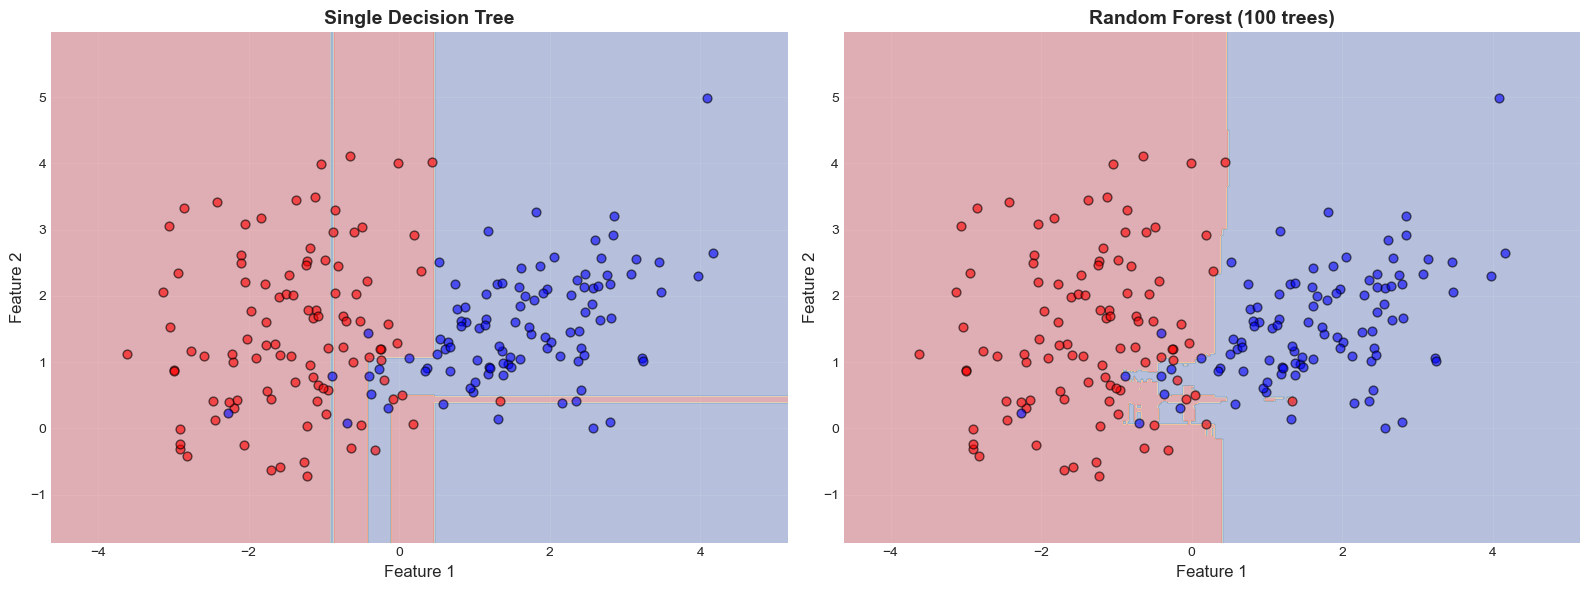


💡 Notice how Random Forest creates smoother, more generalized boundaries!


In [9]:
# Compare decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

models = [tree_single, rf]
titles = ['Single Decision Tree', 'Random Forest (100 trees)']

for idx, (model, title) in enumerate(zip(models, titles)):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axes[idx].contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    axes[idx].scatter(X[y==0, 0], X[y==0, 1], c='red', alpha=0.6, s=40, edgecolors='k')
    axes[idx].scatter(X[y==1, 0], X[y==1, 1], c='blue', alpha=0.6, s=40, edgecolors='k')
    axes[idx].set_xlabel('Feature 1', fontsize=12)
    axes[idx].set_ylabel('Feature 2', fontsize=12)
    axes[idx].set_title(title, fontsize=14, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('\n💡 Notice how Random Forest creates smoother, more generalized boundaries!')

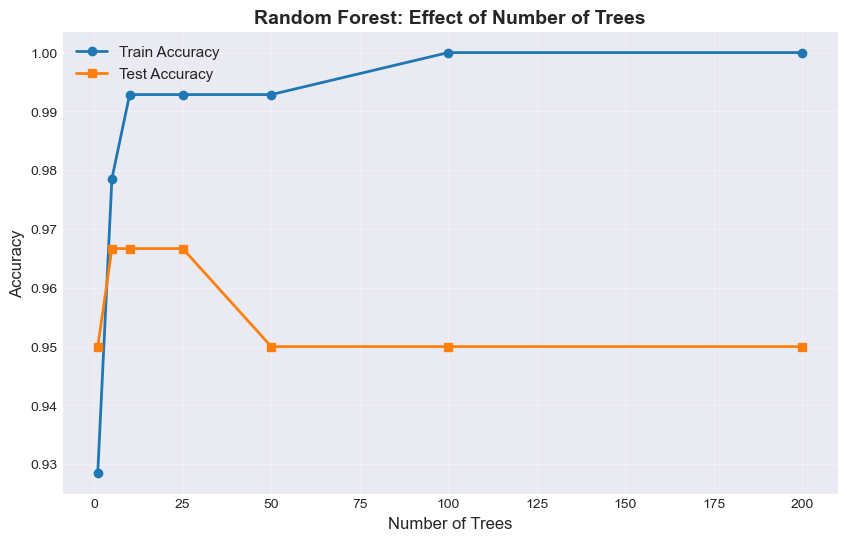


📈 Observation: Performance stabilizes after ~50-100 trees
More trees = more computational cost but diminishing returns


In [10]:
# Experiment with number of trees
n_trees_range = [1, 5, 10, 25, 50, 100, 200]
train_scores = []
test_scores = []

for n_trees in n_trees_range:
    rf_temp = RandomForestClassifier(n_estimators=n_trees, max_depth=5, random_state=42)
    rf_temp.fit(X_train, y_train)
    train_scores.append(rf_temp.score(X_train, y_train))
    test_scores.append(rf_temp.score(X_test, y_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_trees_range, train_scores, 'o-', label='Train Accuracy', linewidth=2)
plt.plot(n_trees_range, test_scores, 's-', label='Test Accuracy', linewidth=2)
plt.xlabel('Number of Trees', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Random Forest: Effect of Number of Trees', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

print('\n📈 Observation: Performance stabilizes after ~50-100 trees')
print('More trees = more computational cost but diminishing returns')

## Part 4: Introduction to XGBoost

Let's see the power of gradient boosting!

In [11]:
# Note: XGBoost needs to be installed separately
# Run: pip install xgboost

try:
    from xgboost import XGBClassifier
    
    # Train XGBoost
    xgb = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
    xgb.fit(X_train, y_train)
    
    # Make predictions
    y_pred_xgb = xgb.predict(X_test)
    xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
    
    print('✅ XGBoost trained!')
    print(f'Accuracy: {xgb_accuracy:.3f}')
    
    # Compare all three methods
    print(f'\n🏆 Algorithm Comparison:')
    print(f'  Decision Tree:  {tree_accuracy:.3f}')
    print(f'  Random Forest:  {rf_accuracy:.3f}')
    print(f'  XGBoost:        {xgb_accuracy:.3f}')
    
except ImportError:
    print('⚠️ XGBoost not installed. Run: pip install xgboost')
    print('For now, we\'ll continue with Random Forest!')

⚠️ XGBoost not installed. Run: pip install xgboost
For now, we'll continue with Random Forest!


## Part 5: Real-World Application - Titanic Survival Prediction

Now let's apply what we learned to the famous Titanic dataset!

In [12]:
# Load Titanic dataset
# Note: Download from https://www.kaggle.com/c/titanic/data
# For now, we'll create a sample version

try:
    # Try to load from local file
    titanic = pd.read_csv('titanic.csv')
except:
    # Use seaborn's titanic dataset as backup
    titanic = sns.load_dataset('titanic')

print('✅ Titanic dataset loaded!')
print(f'Shape: {titanic.shape}')
print(f'\nFirst few rows:')
titanic.head()

✅ Titanic dataset loaded!
Shape: (891, 15)

First few rows:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
# Data preprocessing
# Select features and target
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
target = 'survived'

# Create a copy and handle missing values
df = titanic[features + [target]].copy()
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)
df.dropna(inplace=True)

# Encode categorical variable
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

print('✅ Data preprocessed!')
print(f'\nShape after cleaning: {df.shape}')
print(f'\nSurvival rate: {df[target].mean():.2%}')
print(f'\nFeature info:')
df.info()

✅ Data preprocessed!

Shape after cleaning: (891, 7)

Survival rate: 38.38%

Feature info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   sex       891 non-null    int64  
 2   age       891 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   survived  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [14]:
# Split features and target
X_titanic = df[features].values
y_titanic = df[target].values

# Split train/test
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X_titanic, y_titanic, test_size=0.2, random_state=42
)

print(f'Training set: {len(X_train_t)} samples')
print(f'Test set: {len(X_test_t)} samples')

Training set: 712 samples
Test set: 179 samples


In [15]:
# Train all three models on Titanic data
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
}

# Add XGBoost if available
try:
    from xgboost import XGBClassifier
    models['XGBoost'] = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
except:
    pass

# Train and evaluate
results = []
for name, model in models.items():
    model.fit(X_train_t, y_train_t)
    y_pred = model.predict(X_test_t)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test_t, y_pred),
        'Precision': precision_score(y_test_t, y_pred),
        'Recall': recall_score(y_test_t, y_pred),
        'F1-Score': f1_score(y_test_t, y_pred)
    })

results_df = pd.DataFrame(results)
print('\n🏆 Titanic Survival Prediction Results:')
print(results_df.to_string(index=False))

# Find best model
best_model = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
print(f'\n⭐ Best performing model: {best_model}')


🏆 Titanic Survival Prediction Results:
        Model  Accuracy  Precision   Recall  F1-Score
Decision Tree  0.804469   0.830508 0.662162  0.736842
Random Forest  0.782123   0.786885 0.648649  0.711111

⭐ Best performing model: Decision Tree


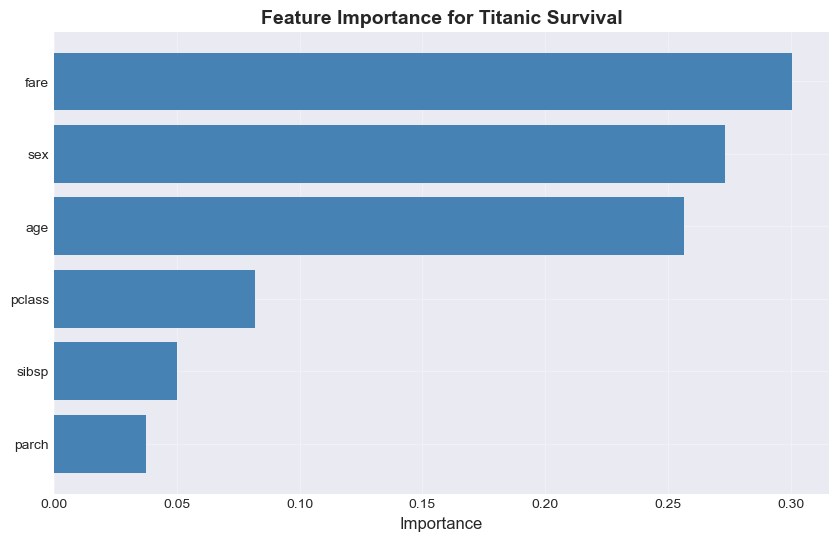


📊 Feature Importance Ranking:
Feature  Importance
   fare    0.300568
    sex    0.273294
    age    0.256716
 pclass    0.081660
  sibsp    0.050145
  parch    0.037616

💡 Most important features determine survival the most!


In [16]:
# Feature importance (using Random Forest)
rf_titanic = RandomForestClassifier(n_estimators=100, random_state=42)
rf_titanic.fit(X_train_t, y_train_t)

# Get feature importance
importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_titanic.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance['Feature'], importance['Importance'], color='steelblue')
plt.xlabel('Importance', fontsize=12)
plt.title('Feature Importance for Titanic Survival', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.show()

print('\n📊 Feature Importance Ranking:')
print(importance.to_string(index=False))
print('\n💡 Most important features determine survival the most!')

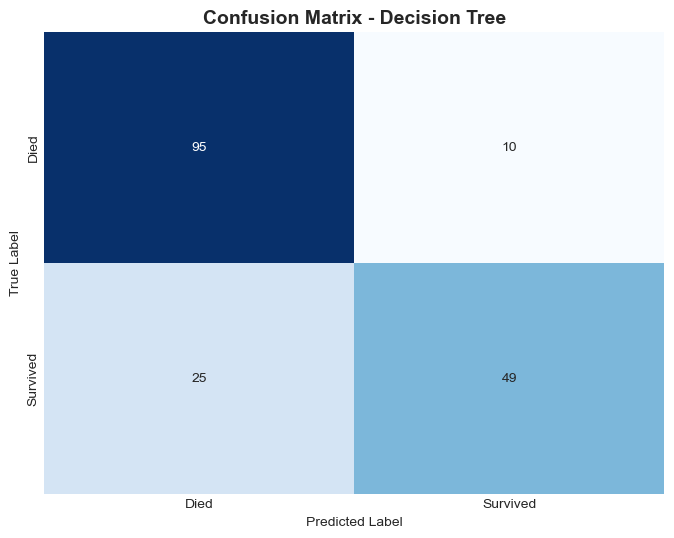


📊 Classification Report:
              precision    recall  f1-score   support

        Died       0.79      0.90      0.84       105
    Survived       0.83      0.66      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



In [17]:
# Confusion Matrix for best model
best_model_obj = models[best_model]
y_pred_best = best_model_obj.predict(X_test_t)

cm = confusion_matrix(y_test_t, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Died', 'Survived'],
            yticklabels=['Died', 'Survived'])
plt.title(f'Confusion Matrix - {best_model}', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print('\n📊 Classification Report:')
print(classification_report(y_test_t, y_pred_best, target_names=['Died', 'Survived']))

## Part 6: Summary and Key Takeaways

Let's recap what we learned today!

### 🎯 Key Concepts:

**Decision Trees:**
- Make decisions by asking YES/NO questions
- Create rectangular decision boundaries
- Prone to overfitting if not pruned
- Easy to interpret and visualize

**Pruning Techniques:**
- `max_depth`: Limit tree depth
- `min_samples_split`: Minimum samples to split a node
- `min_samples_leaf`: Minimum samples in a leaf
- Prevents overfitting and improves generalization

**Random Forest:**
- Ensemble of many decision trees
- Each tree trained on random data samples
- Votes combined for final prediction
- More robust and accurate than single trees
- Reduces overfitting naturally

**XGBoost:**
- Sequential ensemble (boosting)
- Each tree fixes mistakes of previous trees
- Often achieves highest accuracy
- Great for competitions (Kaggle champion!)

### 📊 When to Use Each:

| Algorithm | Best For |
|-----------|----------|
| Decision Tree | Quick interpretable models, small datasets |
| Random Forest | General purpose, robust predictions |
| XGBoost | Maximum accuracy, competitions |

### 💡 Pro Tips:
1. Always start with a baseline Decision Tree
2. Use Random Forest for most real-world problems
3. Try XGBoost when you need maximum accuracy
4. Don't forget feature engineering - it matters more than the algorithm!
5. Use cross-validation to tune hyperparameters

---

**Great job! You've mastered Decision Trees and Ensembles! 🎉**